In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#save file or restart from here:
tag='Multispectral: ' 
tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"
# read pickle file as dataframe
fdfe = pd.read_pickle('data/SQOOP_fdfe_Amir_v4.pkl')
# display the dataframe
fdfe

,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median
0,0.5,30.1,0.01,0.04,0.05,0.029137,15.0,40.0,15.0,0.017002,18.288161,0.998843,3.941760
1,0.5,30.1,0.01,0.04,0.05,0.007064,15.0,40.0,30.0,0.004577,16.612481,0.999916,3.960913
2,0.5,30.1,0.01,0.04,0.05,0.005750,15.0,40.0,60.0,0.003754,15.838545,0.999943,3.783445
3,0.5,30.1,0.01,0.04,0.05,0.006187,15.0,110.0,15.0,0.004024,17.041476,0.999935,3.937373
4,0.5,30.1,0.01,0.04,0.05,0.006523,15.0,110.0,30.0,0.004238,16.600650,0.999928,3.959462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13116,10.0,94.9,0.95,0.30,2.00,0.009592,60.0,110.0,15.0,0.005840,10.817911,0.999864,3.113933
13117,10.0,94.9,0.95,0.30,2.00,0.012989,60.0,110.0,30.0,0.008115,10.465821,0.999737,2.870861
13118,10.0,94.9,0.95,0.30,2.00,0.019695,60.0,110.0,60.0,0.011919,9.901579,0.999432,3.043040
13119,10.0,94.9,0.95,0.30,2.00,0.010503,60.0,170.0,15.0,0.006410,11.091894,0.999836,3.291878


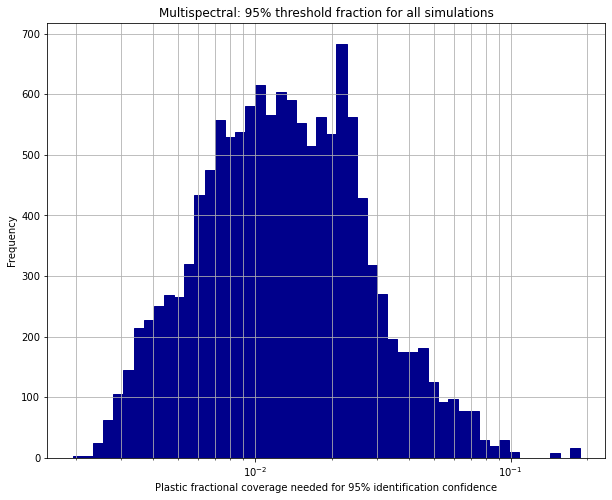

In [11]:
bn=50

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction for all simulations'
plt.title(titl)

this=fdfe['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='FMF=0.01',color='darkblue',edgecolor='darkblue')

plt.xlabel('Plastic fractional coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')
plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_all.pdf')
plt.show()

[0.5, 5.0, 10.0]


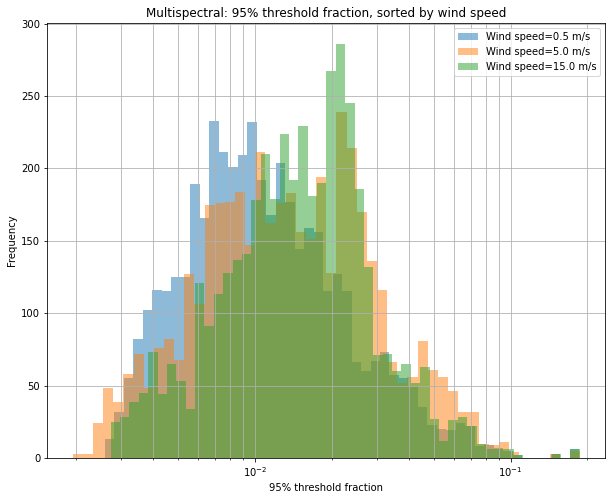

In [12]:
bn=50

a = fdfe['Windspeed(m_s)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by wind speed'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=0.5 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==5.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=5.0 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==10.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=15.0 m/s')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_windspeed.pdf')
plt.show()


[30.1, 70.0, 94.9]


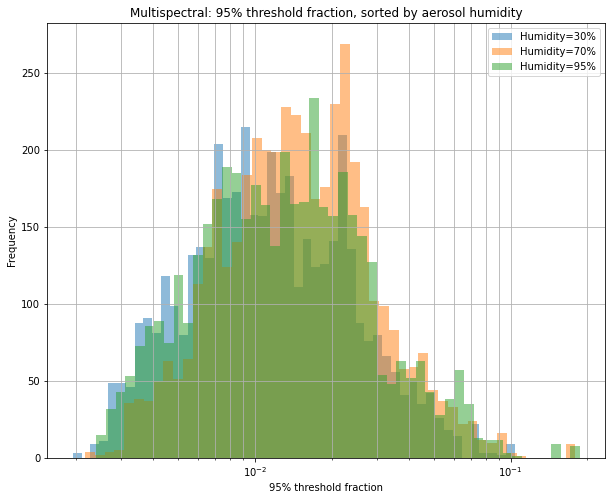

In [13]:
bn=50

a = fdfe['Humidity(%)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol humidity'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==30.1]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=30%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==70.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=70%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==94.9]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=95%')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_humidity.pdf')
plt.show()

[0.01, 0.5, 0.95]


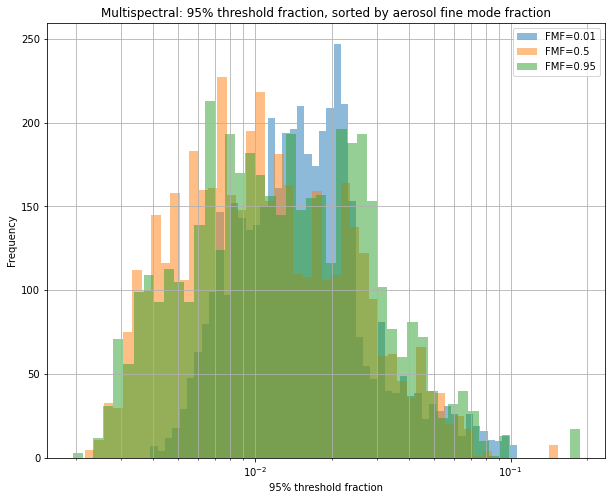

In [14]:
bn=50

a = fdfe['FMF'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol fine mode fraction'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['FMF']==0.01]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.01')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.5')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.95]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.95')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_FMF.pdf')
plt.show()

[0.04, 0.07, 0.1, 0.15, 0.2, 0.3]


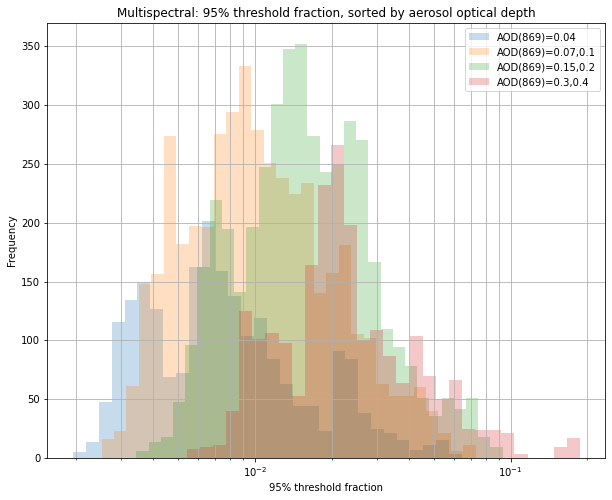

In [15]:
bn=30

a = fdfe['AOD(869)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol optical depth'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['AOD(869)']==0.04]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.04')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.07) | (fdfe['AOD(869)']==0.1)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.07,0.1')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.15) | (fdfe['AOD(869)']==0.2)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.15,0.2')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.3) | (fdfe['AOD(869)']==0.4)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.3,0.4')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_AOD.pdf')
plt.show()


[0.05, 0.5, 2.0]


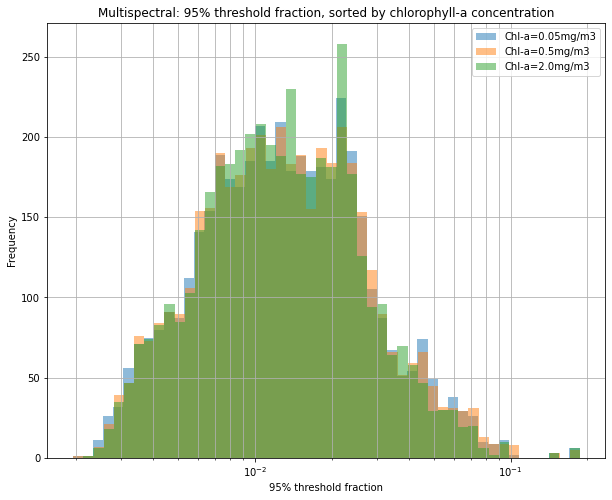

In [16]:
bn=50

a = fdfe['chla(mg_m3)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by chlorophyll-a concentration'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.05]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.05mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.5mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==2.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=2.0mg/m3')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_Chla.pdf')
plt.show()


[15.0, 30.0, 60.0]


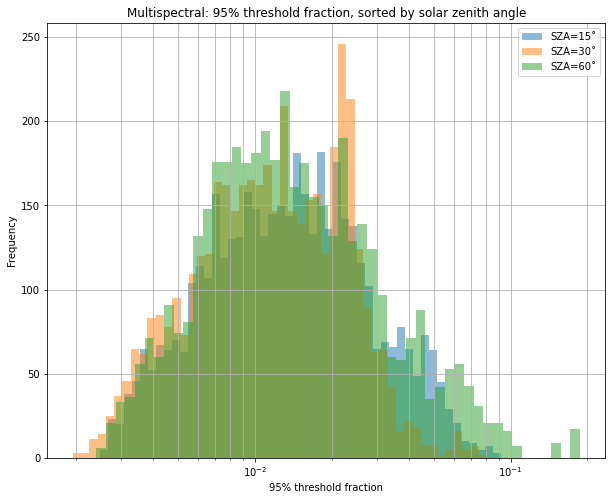

In [17]:
bn=50

a = fdfe['solz'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by solar zenith angle'
plt.title(titl)


this=fdfe['plastic_threshold'][fdfe['solz']==15.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=15˚')

this=fdfe['plastic_threshold'][fdfe['solz']==30.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=30˚')

this=fdfe['plastic_threshold'][fdfe['solz']==60.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=60˚')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_solz.pdf')
plt.show()


In [ ]:
#REMNANT SECTION IN CASE I EVER WANT TO PLOT INDIVIDUAL RESULTS


#make error covariance matrix and prepare jacobian for

#for idx in range(0, z_len):
for idx in range(0, 400):
    print(idx)

    rel_err = np.array([0.01587401, 0.01244266, 0.00938955, 0.01092051, 0.00302288,
                  0.00544271, 0.00999068, 0.01467843, 0.0080387, 0.00944394,
                  0.0193447, 0.0224503, 0.02386379])
    
    err=(meas[idx]*rel_err)**2

    
    #plotting specifics
    font1 = {'family':'serif','color':'black','size':20}
    font2 = {'family':'serif','color':'black','size':15}
    font3 = {'family':'courier new','color':'black','size':20}
    plt.figure(figsize=(16,16)) 
    plt.subplot(2, 2, 1)


    
    #plot simulated values
    plt.scatter(waveln,meas[idx])
    plt.errorbar(waveln,meas[idx],yerr=err,fmt='-')
    plt.title("Simulated data with error bars",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('$rho_t$', fontdict = font2)
    plt.ylim(0.0,0.4)

    #prepare jacobian
    this_jac=jac_all[idx]
    jac=this_jac.transpose()

    #plot jacobians
    plt.subplot(2, 2, 2)
    plt.plot(waveln,this_jac[:,0],'-',label='WS')
    plt.plot(waveln,this_jac[:,1],'-',label='RH')
    plt.plot(waveln,this_jac[:,2],'-',label='FMF')
    plt.plot(waveln,this_jac[:,3],'-',label='AOD')
    plt.plot(waveln,this_jac[:,4],'-',label='CHL')
    plt.plot(waveln,this_jac[:,5],'-',label='PF')
    plt.title("Jacobians",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('Parameter partial derivative', fontdict = font2)
    plt.ylim(-0.3,0.8)
    plt.legend()

    #calculate rodgers stuff
    S_hat, SIC, AvgK, DFS = rodgers(jac, err, ap)
    #print(df.iloc[idx])
    #print_out(S_hat, SIC, AvgK, DFS, jac, err, ap, 0, m_len, n_len, 0 )

    #calculate detection probability metrics
    inc=np.arange(0, 10000, 1)
    val=inc/10000
    det_prob=np.arange(0, 10000, 1) / 10000
    for x in inc:
        Pd, Pd_pcnt_str = detect_prob(val[x], np.sqrt(S_hat[5,5]), doprint=0)
        det_prob[x] = Pd
        

    df.loc[idx]["plastic_uncertainty"]=np.sqrt(S_hat[5,5])  
       
    plt.subplot(2, 2, 3)
    plt.plot(val,det_prob)
    plt.xscale('log')
    plt.title("Plastic detection probability",fontdict = font1)
    plt.xlabel('Plastic fraction',fontdict = font2)
    plt.ylabel('Probability for plastic fraction', fontdict = font2)

    plt.subplot(2, 2, 4)
    plt.axis('off')

    txt='SQOOP simulation # '+str(idx)
    plt.text(.05,0.95,txt,horizontalalignment='left',
         verticalalignment='center',fontdict=font3)
    plt.text(.05,0.55,str(df.loc[idx]),horizontalalignment='left',
         verticalalignment='center',fontdict=font3)    
    
    outname='figures/SQOOP'+str(idx)+'.png'
    plt.savefig(outname)
    plt.close()

